In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [3]:
df = pd.read_csv("../data/2006.csv")

In [4]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,NaN,0,0,0,0,0,0


In [49]:
df["Date"] = df["Year"].map("{:04d}".format) + "-" + df["Month"].map("{:02d}".format) + "-" + df["DayofMonth"].map("{:02d}".format)

In [50]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,13,0,NaN,0,0,0,0,0,0,2006-01-11
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,19,0,NaN,0,0,0,0,0,0,2006-01-11
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,11,0,NaN,0,0,0,0,0,0,2006-01-11
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,10,0,NaN,0,0,0,0,0,0,2006-01-11
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,12,0,NaN,0,0,0,0,0,0,2006-01-11


In [56]:
by_date = df.groupby("Date")["Cancelled"].sum()
by_date.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2006-12-22', '2006-12-23', '2006-12-24', '2006-12-25', '2006-12-26',
       '2006-12-27', '2006-12-28', '2006-12-29', '2006-12-30', '2006-12-31'],
      dtype='object', name='Date', length=365)

done


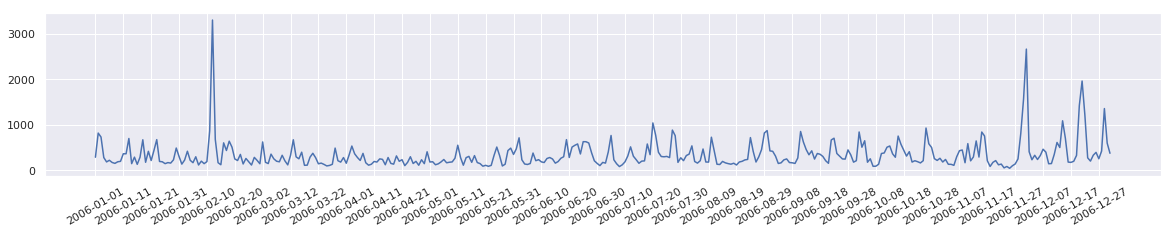

In [67]:
%matplotlib inline
by_date = df.groupby("Date")["Cancelled"].sum()
fig, ax1 = plt.subplots(1, 1, figsize=(20, 3))
g = sns.lineplot(data=by_date, ax=ax1)
g.set(xticks=by_date.index[0::10])
plt.xticks(rotation=30)
print("done")

In [86]:
print("Reason for cancellation (A = carrier, B = weather, C = NAS, D = security)")
df[df.Cancelled == 1].groupby("CancellationCode").size().sort_values(ascending=False)

Reason for cancellation (A = carrier, B = weather, C = NAS, D = security)


CancellationCode
A    55655
B    37913
C    28209
D      157
dtype: int64

In [91]:
print("Cancellations by carrier:")
df[df.Cancelled == 1].groupby("UniqueCarrier").size().sort_values(ascending=False)

Cancellations by carrier:


UniqueCarrier
MQ    19990
OO    12844
UA    10238
AA    10127
XE     9716
YV     9544
WN     8951
DL     7695
OH     6875
EV     6783
US     5511
NW     4854
AS     2430
FL     1941
CO     1649
F9      902
AQ      745
B6      659
HA      253
TZ      227
dtype: int64